In [1]:
import pandas as pd
from mplsoccer import Pitch
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np

In [5]:
firstHalf = pd.read_csv("Data/Santa Clara/santaClara1.csv")
beforeRed = pd.read_csv("Data/Santa Clara/santaClara2BeforeRed.csv")
afterRed = pd.read_csv("Data/Santa Clara/santaClara2afterRed.csv")
firstHalf.insert(7,"Half",1)
firstHalf.dropna(inplace=True)
beforeRed.insert(7,"Half",2)
beforeRed.insert(8,"Red",False)
beforeRed.dropna(inplace=True)
afterRed.insert(7,"Half",2)
afterRed.insert(8,"Red",True)
afterRed.dropna(inplace=True)
secondHalf = pd.merge(beforeRed,afterRed,how="outer")
dfs = []
for df in [firstHalf,secondHalf]:
    startX = []
    startY = []
    endX = []
    endY = []
    for i in range(df.shape[0]):
        row = df.iloc[i]
        startX.append(float(row.get("Start Pos").split(", ")[0][1:]))
        startY.append(float(row.get("Start Pos").split(", ")[1][:-1]))
        endX.append(float(row.get("End Pos").split(", ")[0][1:]))
        endY.append(float(row.get("End Pos").split(", ")[1][:-1]))
    df = df.assign(startX = startX)
    df =df.assign(startY = startY)
    df =df.assign(endX = endX)
    df =df.assign(endY = endY)
    dfs.append(df)
firstHalf=dfs[0]
firstHalf = firstHalf.reset_index()
secondHalf=dfs[1]
secondHalf = secondHalf.reset_index()
secondHalf = secondHalf.assign(index = secondHalf.get("index")+firstHalf.shape[0])
secondHalf = secondHalf.assign(startX = 120-secondHalf.get("startX"))
secondHalf = secondHalf.assign(startY = 80-secondHalf.get("startY"))
secondHalf = secondHalf.assign(endX = 120-secondHalf.get("endX"))
secondHalf = secondHalf.assign(endY = 80-secondHalf.get("endY"))
data = pd.merge(firstHalf,secondHalf,how="outer")


In [8]:
data

,index,Game,numOpportunity,Event,Result,Start Pos,End Pos,Team,Half,startX,startY,endX,endY,Red
0,1,Enter a game,0.0,1st Ball,Successful,"[30.761904761904752, 56.38095238095238]","[-1, -1]",Opponent,1,30.761905,56.380952,-1.000000,-1.000000,NaN
1,3,Enter a game,0.0,2nd Ball,Successful,"[23.33333333333332, 59.61904761904762]","[23.33333333333332, 59.61904761904762]",Matt,1,23.333333,59.619048,23.333333,59.619048,NaN
2,5,Enter a game,0.0,1st Ball,Successful,"[23.7142857142857, 54.666666666666664]","[23.52380952380951, 54.666666666666664]",Jonah,1,23.714286,54.666667,23.523810,54.666667,NaN
3,7,Enter a game,0.0,2nd Ball,Successful,"[37.99999999999999, 57.523809523809526]","[37.99999999999999, 57.523809523809526]",Opponent,1,38.000000,57.523810,38.000000,57.523810,NaN
4,9,Enter a game,0.0,Pass,Unsuccessful,"[32.09523809523808, 31.23809523809524]","[89.42857142857142, 62.095238095238095]",UCSD,1,32.095238,31.238095,89.428571,62.095238,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357,357,Santa Clara,0.0,Tackle,Unsuccessful,"[100.85714285714286, 74.28571428571428]","[-1, -1]",Quin,2,19.142857,5.714286,121.000000,81.000000,False
358,358,Santa Clara,0.0,Tackle,Unsuccessful,"[34.57142857142856, 21.904761904761912]","[34.57142857142856, 21.904761904761912]",Quin,2,85.428571,58.095238,85.428571,58.095238,False
359,359,Santa Clara,0.0,Tackle,Unsuccessful,"[65.23809523809521, 17.714285714285722]","[65.23809523809521, 17.714285714285722]",Quin,2,54.761905,62.285714,54.761905,62.285714,False
360,360,Santa Clara,0.0,Tackle,Unsuccessful,"[76.85714285714283, 35.42857142857143]","[-1, -1]",Quin,2,43.142857,44.571429,121.000000,81.000000,False


In [9]:
def distance(startX,startY,endX,endY):
    return np.sqrt((endX-startX)**2+(endY-startY)**2)

In [10]:
pd.concat([firstHalf,secondHalf])
data

,index,Game,numOpportunity,Event,Result,Start Pos,End Pos,Team,Half,startX,startY,endX,endY,Red
0,1,Enter a game,0.0,1st Ball,Successful,"[30.761904761904752, 56.38095238095238]","[-1, -1]",Opponent,1,30.761905,56.380952,-1.000000,-1.000000,NaN
1,3,Enter a game,0.0,2nd Ball,Successful,"[23.33333333333332, 59.61904761904762]","[23.33333333333332, 59.61904761904762]",Matt,1,23.333333,59.619048,23.333333,59.619048,NaN
2,5,Enter a game,0.0,1st Ball,Successful,"[23.7142857142857, 54.666666666666664]","[23.52380952380951, 54.666666666666664]",Jonah,1,23.714286,54.666667,23.523810,54.666667,NaN
3,7,Enter a game,0.0,2nd Ball,Successful,"[37.99999999999999, 57.523809523809526]","[37.99999999999999, 57.523809523809526]",Opponent,1,38.000000,57.523810,38.000000,57.523810,NaN
4,9,Enter a game,0.0,Pass,Unsuccessful,"[32.09523809523808, 31.23809523809524]","[89.42857142857142, 62.095238095238095]",UCSD,1,32.095238,31.238095,89.428571,62.095238,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357,357,Santa Clara,0.0,Tackle,Unsuccessful,"[100.85714285714286, 74.28571428571428]","[-1, -1]",Quin,2,19.142857,5.714286,121.000000,81.000000,False
358,358,Santa Clara,0.0,Tackle,Unsuccessful,"[34.57142857142856, 21.904761904761912]","[34.57142857142856, 21.904761904761912]",Quin,2,85.428571,58.095238,85.428571,58.095238,False
359,359,Santa Clara,0.0,Tackle,Unsuccessful,"[65.23809523809521, 17.714285714285722]","[65.23809523809521, 17.714285714285722]",Quin,2,54.761905,62.285714,54.761905,62.285714,False
360,360,Santa Clara,0.0,Tackle,Unsuccessful,"[76.85714285714283, 35.42857142857143]","[-1, -1]",Quin,2,43.142857,44.571429,121.000000,81.000000,False


0.6290322580645161

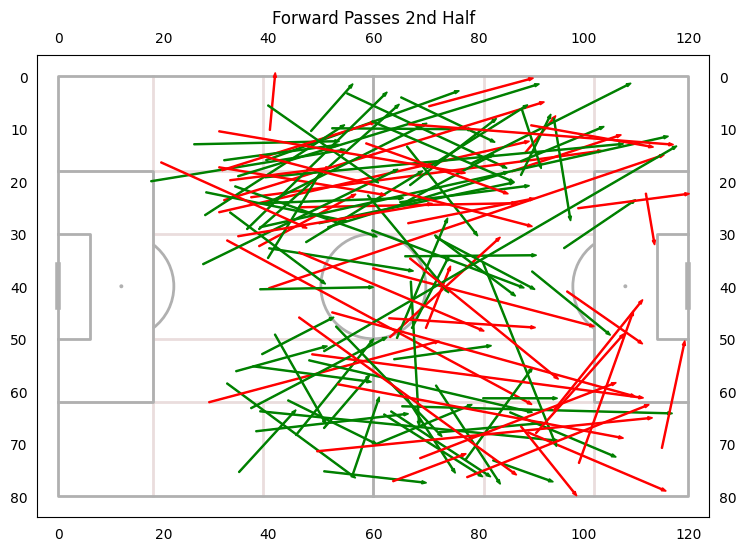

In [19]:
passes = data[data.get("Event")=="Pass"]
passes = passes.assign(Back = passes.get("endX")<passes.get("startX"))
passes = passes.assign(Distance = distance(passes.get("startX"),passes.get("startY"),passes.get("endX"),passes.get("endY")))
backPasses = passes[passes.get("Back")]

forwardPasses = passes[(~passes.get("Back"))&(passes.get("Team")!="Opponent")]
firstHalfForward = forwardPasses[forwardPasses.get("Half")==1]
secondHalfForward = forwardPasses[forwardPasses.get("Half")==2]
sucessful = forwardPasses[forwardPasses.get("Result")=="Successful"]
unsucessful = forwardPasses[forwardPasses.get("Result")=="Unsuccessful"]

pitch = Pitch(positional=True, axis=True,label=True)
fig, ax = plt.subplots(figsize = (10,6))
pitch.draw(ax=ax)
#kde = sns.kdeplot(x=unsucessful.get("endX"),y=unsucessful.get("endY"),fill = True,shade_lowest = False,alpha = .5,n_levels = 25,cmap = "magma")
for i in range(forwardPasses.shape[0]):
    row = forwardPasses.iloc[i]
    if row.get("Result") == "Successful":
        color = "green"
    else:
        color = "red"
    if row.get("Event") == "Tackle" and row.get("End Pos") == "[-1, -1]":
        plt.plot(row.get("startX"),row.get("startY"),'ro',label = "Tackle")
        continue
    plt.arrow(row.get("startX"),row.get("startY"),row.get("endX")-row.get("startX"),row.get("endY")-row.get("startY"),width = .2,alpha = 1,color = color)
plt.title("Forward Passes 2nd Half")
forwardPasses.drop(["Game","Event","Result","Team","Start Pos","End Pos"],axis=1).groupby("Half").mean()
sucessful.shape[0]/(sucessful.shape[0]+unsucessful.shape[0])

In [12]:
forwardPasses.groupby(["Half","Result"]).count()

index  Game  numOpportunity  Event  Start Pos  End Pos  \
Half Result                                                                 
1    Successful       44    44              44     44         44       44   
     Unsuccessful     22    22              22     22         22       22   
2    Successful       34    34              34     34         34       34   
     Unsuccessful     24    24              24     24         24       24   

                   Team  startX  startY  endX  endY  Red  Back  Distance  
Half Result                                                               
1    Successful      44      44      44    44    44    0    44        44  
     Unsuccessful    22      22      22    22    22    0    22        22  
2    Successful      34      34      34    34    34   34    34        34  
     Unsuccessful    24      24      24    24    24   24    24        24

Jonah: 35
Pass percent:  0.7714285714285715
Back Pass Percent:  0.42857142857142855


Text(0.5, 1.0, 'Jonah')

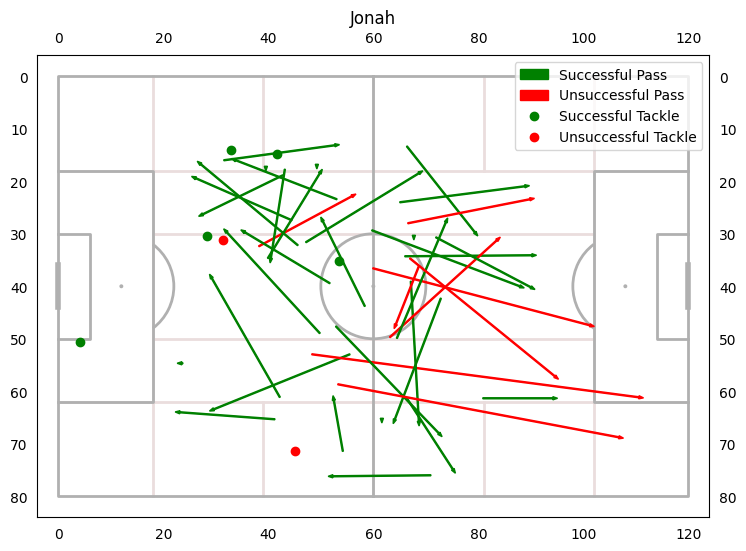

In [13]:
jonah = data[data.get("Team")=="Jonah"]
total = jonah[jonah.get("Event")=="Pass"].shape[0]
successPass = jonah[(jonah.get("Event")=="Pass") & (jonah.get("Result") == "Successful")].shape[0]
print("Jonah:", total)
print("Pass percent: ",successPass/total)
totalPasses = passes[passes.get("Team")=="Jonah"].shape[0]
backPasses = passes[(passes.get("Team")=="Jonah")&(passes.get("Back"))].shape[0]
print("Back Pass Percent: ",backPasses/totalPasses)


pitch = Pitch(positional=True, axis=True,label=True)
fig, ax = plt.subplots(figsize = (10,6))
pitch.draw(ax=ax)
#kde = sns.kdeplot(x=jonah.get("startX"),y=jonah.get("startY"),fill = True,shade_lowest = False,alpha = .5,n_levels = 25,cmap = "magma")
for i in range(jonah.shape[0]):
    row = jonah.iloc[i]
    result = row.get("Result")
    if row.get("Result") == "Successful":
        color = "green"
    else:
        color = "red"
    if row.get("Event") == "Tackle":
        if result == "Successful":
            color = "og"
        else:
            color = "ro"
        plt.plot(row.get("startX"),row.get("startY"),color,label = result+" Tackle")
        continue
    plt.arrow(row.get("startX"),row.get("startY"),row.get("endX")-row.get("startX"),row.get("endY")-row.get("startY"),width = .2,alpha = 1,color = color, label = result+" Pass")
handles, labels = plt.gca().get_legend_handles_labels()
unique_labels = dict(zip(labels, handles))

plt.legend(unique_labels.values(), unique_labels.keys())
plt.title("Jonah")

quin: 15
Pass percent:  0.7333333333333333
Back Pass Percent:  0.3333333333333333


Text(0.5, 1.0, 'Quin')

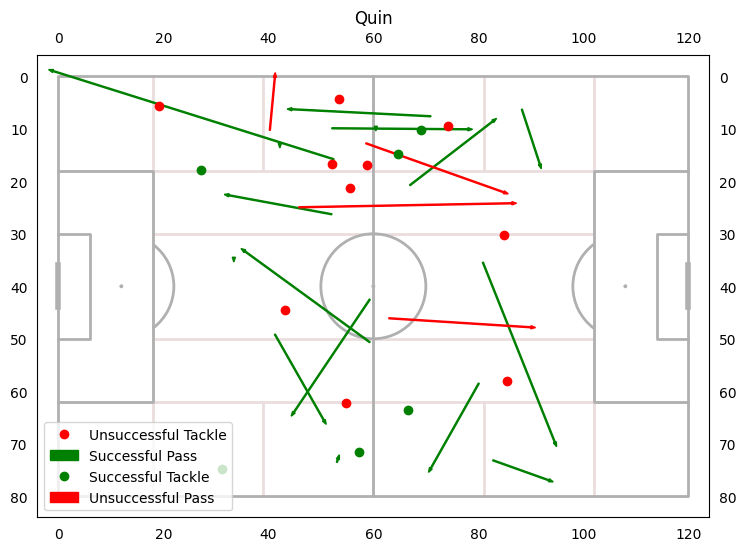

In [14]:
quin = data[data.get("Team")=="Quin"]
total = quin[quin.get("Event")=="Pass"].shape[0]
successPass = quin[(quin.get("Event")=="Pass") & (quin.get("Result") == "Successful")].shape[0]
print("quin:", total)
print("Pass percent: ",successPass/total)
totalPasses = passes[passes.get("Team")=="Quin"].shape[0]
backPasses = passes[(passes.get("Team")=="Quin")&(passes.get("Back"))].shape[0]
print("Back Pass Percent: ",backPasses/totalPasses)



pitch = Pitch(positional=True, axis=True,label=True)
fig, ax = plt.subplots(figsize = (10,6))
pitch.draw(ax=ax)
#kde = sns.kdeplot(x=quin.get("startX"),y=quin.get("startY"),fill = True,shade_lowest = False,alpha = .5,n_levels = 25,cmap = "magma")
for i in range(quin.shape[0]):
    row = quin.iloc[i]
    result = row.get("Result")
    if row.get("Result") == "Successful":
        color = "green"
    else:
        color = "red"
    if row.get("Event") == "Tackle":
        if result == "Successful":
            color = "og"
        else:
            color = "ro"
        plt.plot(row.get("startX"),row.get("startY"),color,label = result+" Tackle")
        continue
    plt.arrow(row.get("startX"),row.get("startY"),row.get("endX")-row.get("startX"),row.get("endY")-row.get("startY"),width = .2,alpha = 1,color = color, label = result+" Pass")
handles, labels = plt.gca().get_legend_handles_labels()
unique_labels = dict(zip(labels, handles))

plt.legend(unique_labels.values(), unique_labels.keys())
plt.title("Quin")

,index,Game,numOpportunity,Event,Result,Start Pos,End Pos,Team,startX,startY,endX,endY,Red,Back,Distance
Half,,,,,,,,,,,,,,,
1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1
2,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5


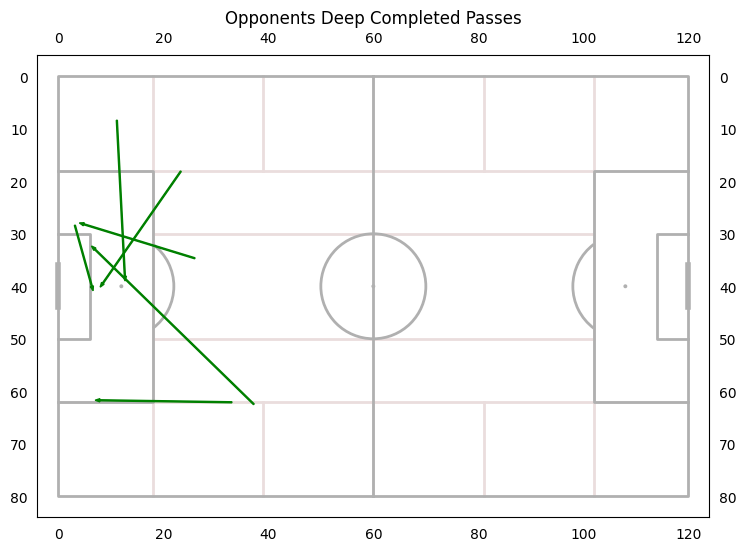

In [16]:
oppPasses = passes[(passes.get("Team")=="Opponent")]
pitch = Pitch(positional=True, axis=True,label=True)
fig, ax = plt.subplots(figsize = (10,6))
pitch.draw(ax=ax)
for i in range(oppPasses.shape[0]):
    row = oppPasses.iloc[i]
    if row.get("Result") == "Successful":
        color = "green"
    else:
        color = "red"
    if row.get("Event") == "Tackle" and row.get("End Pos") == "[-1, -1]":
        plt.plot(row.get("startX"),row.get("startY"),'ro',label = "Tackle")
        continue
    plt.arrow(row.get("startX"),row.get("startY"),row.get("endX")-row.get("startX"),row.get("endY")-row.get("startY"),width = .2,alpha = 1,color = color)

plt.title("Opponents Deep Completed Passes")
oppPasses.groupby("Half").count()

2

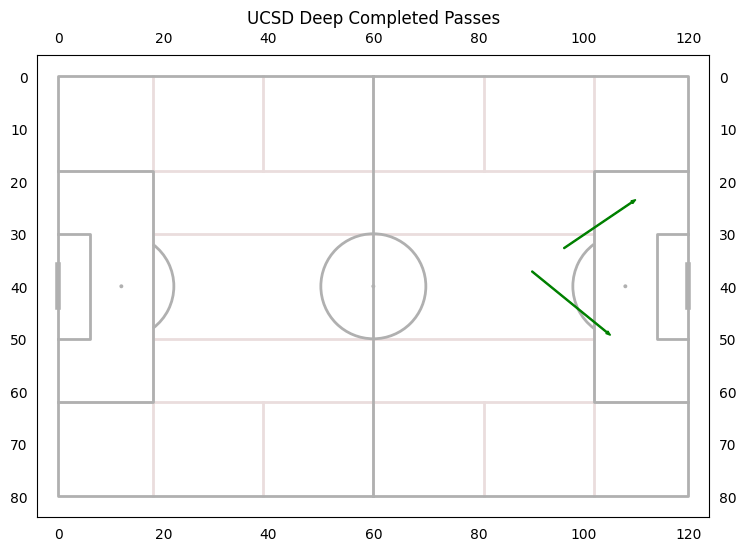

In [18]:
ucsdPasses = passes[(passes.get("Team")!="Opponent")&(passes.get("Result")=="Successful")]
deepPasses = ucsdPasses[(ucsdPasses.get("endX")>102)&(ucsdPasses.get("endY")<62)&(ucsdPasses.get("endY")>18)]
pitch = Pitch(positional=True, axis=True,label=True)
fig, ax = plt.subplots(figsize = (10,6))
pitch.draw(ax=ax)
#kde = sns.kdeplot(x=deepPasses.get("startX"),y=deepPasses.get("startY"),fill = True,shade_lowest = False,alpha = .5,n_levels = 25,cmap = "magma")
for i in range(deepPasses.shape[0]):
    row = deepPasses.iloc[i]
    plt.arrow(row.get("startX"),row.get("startY"),row.get("endX")-row.get("startX"),row.get("endY")-row.get("startY"),width = .2,color = "green")
plt.title("UCSD Deep Completed Passes")
deepPasses.shape[0]

In [12]:
deepPasses

,index,Game,numOpportunity,Event,Result,Start Pos,End Pos,Team,Half,startX,startY,endX,endY,Back,Distance
88,176,UNLV,1.0,Pass,Successful,"[93.61904761904762, 57.523809523809526]","[109.42857142857142, 52.19047619047619]",UCSD,1,93.619048,57.523810,109.428571,52.190476,False,16.684888
92,184,UNLV,1.0,Pass,Successful,"[94.76190476190476, 62.476190476190474]","[110.95238095238093, 61.142857142857146]",UCSD,1,94.761905,62.476190,110.952381,61.142857,False,16.245285
114,228,UNLV,1.0,Pass,Successful,"[78.76190476190476, 31.61904761904762]","[105.23809523809524, 35.61904761904762]",UCSD,1,78.761905,31.619048,105.238095,35.619048,False,26.776644
115,230,UNLV,1.0,Pass,Successful,"[111.52380952380952, 19.42857142857143]","[107.7142857142857, 26.095238095238102]",UCSD,1,111.523810,19.428571,107.714286,26.095238,True,7.678341
226,325,UNLV,1.0,Pass,Successful,"[108.47619047619045, 14.857142857142861]","[102.95238095238093, 23.04761904761905]",UCSD,1,108.476190,14.857143,102.952381,23.047619,True,9.879088
247,339,UNLV,1.0,Pass,Successful,"[87.14285714285714, 50.85714285714286]","[104.47619047619045, 26.66666666666667]",Quin,1,87.142857,50.857143,104.476190,26.666667,False,29.759428
379,457,UNLV,0.0,Pass,Successful,"[30.380952380952372, 31.61904761904762]","[14.571428571428562, 55.42857142857143]",Jonah,2,89.619048,48.380952,105.428571,24.571429,False,28.580316
393,471,UNLV,0.0,Pass,Successful,"[3.3333333333333215, 16.76190476190476]","[9.428571428571416, 34.85714285714286]",UCSD,2,116.666667,63.238095,110.571429,45.142857,True,19.094229
412,490,UNLV,0.0,Pass,Successful,"[3.904761904761891, 10.857142857142861]","[7.523809523809511, 37.142857142857146]",UCSD,2,116.095238,69.142857,112.476190,42.857143,True,26.533682


In [13]:
data

,index,Game,numOpportunity,Event,Result,Start Pos,End Pos,Team,Half,startX,startY,endX,endY
0,1,UNLV,0.0,1st Ball,Unsuccessful,"[33.99999999999999, 66.85714285714286]","[-1, -1]",Matt,1,34.000000,66.857143,-1.000000,-1.000000
1,3,UNLV,0.0,2nd Ball,Successful,"[25.809523809523796, 69.9047619047619]","[25.809523809523796, 69.9047619047619]",Evan,1,25.809524,69.904762,25.809524,69.904762
2,5,UNLV,0.0,Pass,Unsuccessful,"[27.14285714285713, 70.85714285714286]","[55.14285714285713, 56.0]",Evan,1,27.142857,70.857143,55.142857,56.000000
3,7,UNLV,0.0,1st Ball,Successful,"[65.04761904761904, 48.952380952380956]","[-1, -1]",Opponent,1,65.047619,48.952381,-1.000000,-1.000000
4,9,UNLV,0.0,2nd Ball,Successful,"[42.57142857142856, 34.095238095238095]","[44.85714285714284, 34.285714285714285]",Opponent,1,42.571429,34.095238,44.857143,34.285714
...,...,...,...,...,...,...,...,...,...,...,...,...,...
428,506,UNLV,0.0,2nd Ball,Successful,"[64.47619047619045, 55.04761904761905]","[64.47619047619045, 55.42857142857143]",Opponent,2,55.523810,24.952381,55.523810,24.571429
429,507,UNLV,0.0,Tackle,Successful,"[63.33333333333332, 51.80952380952381]","[63.52380952380951, 51.80952380952381]",Jonah,2,56.666667,28.190476,56.476190,28.190476
430,508,UNLV,0.0,Pass,Unsuccessful,"[35.7142857142857, 50.285714285714285]","[13.428571428571416, 80.0]",UCSD,2,84.285714,29.714286,106.571429,0.000000
431,509,UNLV,0.0,Tackle,Successful,"[37.04761904761903, 50.476190476190474]","[-1, -1]",Quin,2,82.952381,29.523810,121.000000,81.000000


In [33]:
balls = data[((data.get("Event") == "1st Ball") | (data.get("Event")=="2nd Ball"))]
firstBalls = balls[balls.get("Event")=="1st Ball"]
secondBalls = balls[balls.get("Event")=="2nd Ball"]
balls

,index,Game,numOpportunity,Event,Result,Start Pos,End Pos,Team,Half,startX,startY,endX,endY,Red
0,1,Enter a game,0.0,1st Ball,Successful,"[30.761904761904752, 56.38095238095238]","[-1, -1]",Opponent,1,30.761905,56.380952,-1.000000,-1.000000,NaN
1,3,Enter a game,0.0,2nd Ball,Successful,"[23.33333333333332, 59.61904761904762]","[23.33333333333332, 59.61904761904762]",Matt,1,23.333333,59.619048,23.333333,59.619048,NaN
2,5,Enter a game,0.0,1st Ball,Successful,"[23.7142857142857, 54.666666666666664]","[23.52380952380951, 54.666666666666664]",Jonah,1,23.714286,54.666667,23.523810,54.666667,NaN
3,7,Enter a game,0.0,2nd Ball,Successful,"[37.99999999999999, 57.523809523809526]","[37.99999999999999, 57.523809523809526]",Opponent,1,38.000000,57.523810,38.000000,57.523810,NaN
5,11,Enter a game,0.0,1st Ball,Successful,"[38.76190476190475, 48.952380952380956]","[-1, -1]",Opponent,1,38.761905,48.952381,-1.000000,-1.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253,259,Enter a game,0.0,1st Ball,Successful,"[85.42857142857142, 6.476190476190482]","[85.42857142857142, 6.476190476190482]",UCSD,1,85.428571,6.476190,85.428571,6.476190,NaN
254,259,Santa Clara,0.0,2nd Ball,Successful,"[99.14285714285714, 49.714285714285715]","[99.14285714285714, 49.714285714285715]",UCSD,2,20.857143,30.285714,20.857143,30.285714,False
255,260,Enter a game,0.0,2nd Ball,Successful,"[93.42857142857142, 4.0]","[94.19047619047618, 5.142857142857153]",UCSD,1,93.428571,4.000000,94.190476,5.142857,NaN
261,263,Enter a game,0.0,1st Ball,Successful,"[109.23809523809524, 50.85714285714286]","[-1, -1]",Opponent,1,109.238095,50.857143,-1.000000,-1.000000,NaN


,,index,Game,numOpportunity,Event,Start Pos,End Pos,Half,startX,startY,endX,endY,Red
Team,Result,,,,,,,,,,,,
Adam,Successful,6,6,6,6,6,6,6,6,6,6,6,0
Carter,Successful,2,2,2,2,2,2,2,2,2,2,2,0
Evan,Successful,2,2,2,2,2,2,2,2,2,2,2,0
Jonah,Successful,1,1,1,1,1,1,1,1,1,1,1,0
Opponent,Successful,21,21,21,21,21,21,21,21,21,21,21,0
Quin,Successful,1,1,1,1,1,1,1,1,1,1,1,0
UCSD,Successful,8,8,8,8,8,8,8,8,8,8,8,0


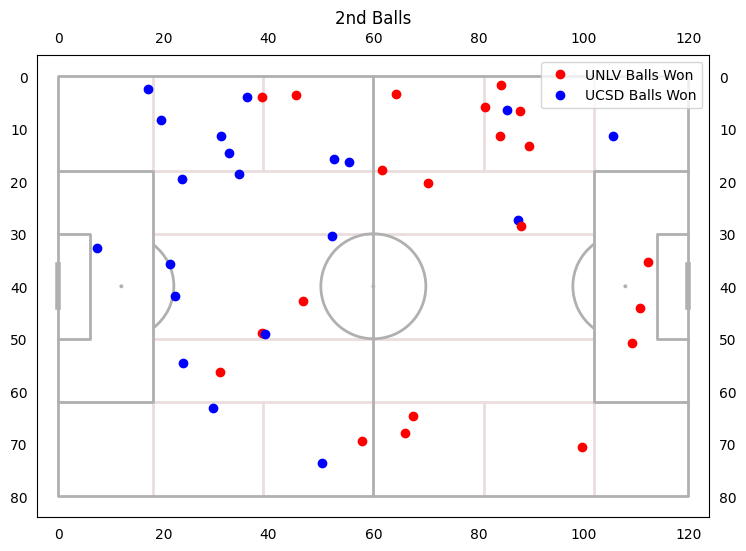

In [32]:
balls
pitch = Pitch(positional=True, axis=True,label=True)
fig, ax = plt.subplots(figsize = (10,6))
pitch.draw(ax=ax)
for i in range(firstBalls.shape[0]):
    row = firstBalls.iloc[i]
    team = row.get("Team")
    result = row.get("Result")
    if team!="Opponent" and result == "Successful":
        color = "ob"
        label = "UCSD Balls Won"
    else:
        color = "ro"
        label = "UNLV Balls Won"
    plt.plot(row.get("startX"),row.get("startY"),color,label = label)
handles, labels = plt.gca().get_legend_handles_labels()
unique_labels = dict(zip(labels, handles))
plt.legend(unique_labels.values(), unique_labels.keys())
plt.title("2nd Balls")
firstBalls.groupby(["Team","Result"]).count()

In [37]:
ballsHalf = balls[balls.get("Half") == 2]
bothBalls = []
balls1 = []
balls2 = []
previous = balls.iloc[0]
for i in range(1, balls.shape[0]):
    previous = balls.iloc[i-1]
    prevTeam = previous.get("Team") == "Opponent"
    prevResult = previous.get("Result")
    row = balls.iloc[i]
    currTeam = row.get("Team") == "Opponent"
    currResult = row.get("Result")
    if previous.get("Event") == "1st Ball" and row.get("Event") == "2nd Ball":
        if prevResult == "Unsuccessful":
            prevTeam = bool(~prevTeam)
            prevResult = "Successful"
        if currResult == "Unsuccessful":
            currTeam = bool(~currTeam)
            currResult ="Successful"
        bothBalls.append([prevTeam,prevResult,currTeam,currResult])
        balls1.append([previous.get("Team")=="Opponent",previous.get("Result")])
        balls2.append([row.get("Team")=="Opponent",row.get("Result")])
    #previous = row
allBalls = pd.DataFrame(bothBalls,columns=["1st Ball Team","1st Ball Result","2nd Ball Team","2nd Ball Result"])
opp1st = allBalls[~allBalls.get("1st Ball Team")]
opp1st.groupby("2nd Ball Team").count()

,1st Ball Team,1st Ball Result,2nd Ball Result
2nd Ball Team,,,
False,7,7,7
True,9,9,9


,,index,Game,numOpportunity,Event,Start Pos,End Pos,Half,startX,startY,endX,endY
Team,Result,,,,,,,,,,,
Adam,Successful,3,3,3,3,3,3,3,3,3,3,3
Evan,Successful,10,10,10,10,10,10,10,10,10,10,10
Jonah,Successful,2,2,2,2,2,2,2,2,2,2,2
Matt,Successful,1,1,1,1,1,1,1,1,1,1,1
Opponent,Successful,29,29,29,29,29,29,29,29,29,29,29
Quin,Successful,1,1,1,1,1,1,1,1,1,1,1
UCSD,Successful,10,10,10,10,10,10,10,10,10,10,10


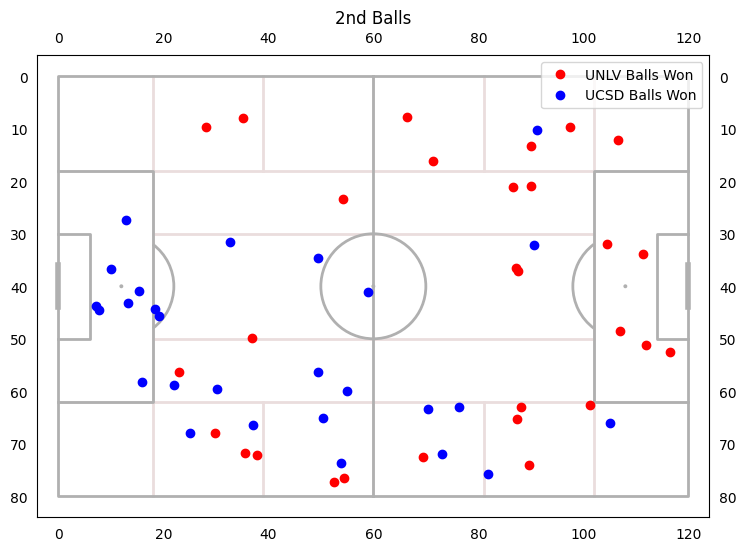

In [17]:
ballsHalf = balls[balls.get("Half") == 1]
firstBalls = ballsHalf[ballsHalf.get("Event")=="1st Ball"]
secondBalls = ballsHalf[ballsHalf.get("Event")=="2nd Ball"]
pitch = Pitch(positional=True, axis=True,label=True)
fig, ax = plt.subplots(figsize = (10,6))
pitch.draw(ax=ax)
for i in range(firstBalls.shape[0]):
    row = firstBalls.iloc[i]
    team = row.get("Team")
    result = row.get("Result")
    if team!="Opponent" and result == "Successful":
        color = "ob"
        label = "UCSD Balls Won"
    else:
        color = "ro"
        label = "UNLV Balls Won"
    plt.plot(row.get("startX"),row.get("startY"),color,label = label)
handles, labels = plt.gca().get_legend_handles_labels()
unique_labels = dict(zip(labels, handles))
plt.legend(unique_labels.values(), unique_labels.keys())
plt.title("2nd Balls")
firstBalls.groupby(["Team","Result"]).count()

In [18]:
forwardPasses[forwardPasses.get("Result") == "Successful"].shape[0]

118

In [39]:
data[(data.get("Event").apply(lambda event: "Shot" in event))&(data.get("Team")!="UCSD")].shape[0]

11